# Ford GoBike System Data
## by Mzoon Alkadi

## Investigation Overview

>This project is a part of Udacity's Data Analyst Nanodegree. It involves analyzing thhe Ford GoBike dataset of San Fransisco area from February 2019 to discover relationships and insights and then visualizing them.


## Dataset Overview

> The Ford GoBike System dataset is provided by Ford GoBike that is known as Lyft Bikes which is a company that provides on-demand bike rentals for customers in San Francisco Bay area.
Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city and they can pay for the service either through a yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with trips under thirty minutes in length having no additional charge; longer trips will incur overtime fees.
The dataset includes information about individual rides during the year 2019 such as bike id, time ,and date. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('201902-fordgobike-tripdata.csv') #Creating a new dataframe to load the dataset in it

In [4]:
df_clean=df_clean.dropna()
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['start_day'] = df_clean['start_time'].dt.strftime('%a') 
df_clean['start_hour'] = df_clean['start_time'].dt.hour 
df_clean['member_age'] = df_clean['start_time'].dt.year - df_clean['member_birth_year']
index = df_clean[(df_clean['member_age'] > 80)|(df_clean['member_age'] < 18)].index
df_clean.drop(index, inplace=True)
df_clean['duration_sec']=df_clean['duration_sec']/60
df_clean.rename(columns={"duration_sec": "duration_min"}, inplace=True)
df_clean = df_clean.drop(['start_time','end_time','start_station_id','start_station_name','start_station_latitude','start_station_longitude','end_station_id','end_station_name','end_station_latitude','end_station_longitude','bike_id','member_birth_year','bike_share_for_all_trip'], axis = 1)

## Start Day Distribution 

> The following graph explore the distibution of trips over the weekdays. As we can see Thursday shows the highest demand of bike trips over the weekdays.

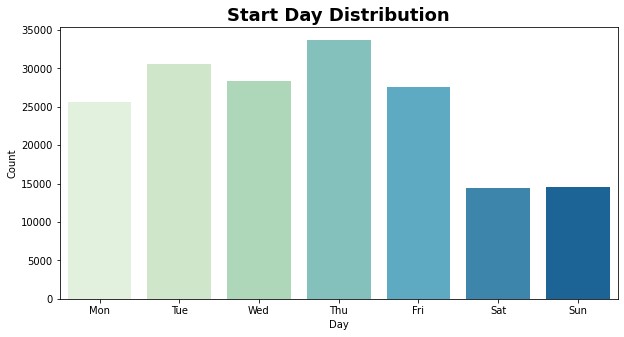

In [5]:
plt.figure(figsize=(10,5))
sb.countplot(data=df_clean, x='start_day', palette='GnBu',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Start Day Distribution',fontsize=18 , fontweight = 'bold')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

## Trips number based on day for each type

> The next visualization represents the relationship between the trip day and user type. Intrestingly,we can observe that Customers keep a consistent pattern during all weekdays while Subscribers ride more on work days than weekend.

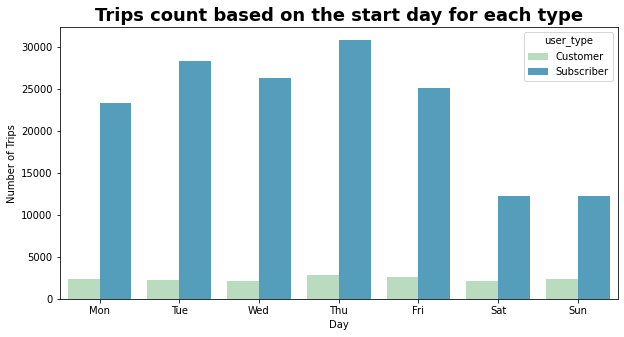

In [5]:
plt.figure(figsize=(10,5))
sb.countplot(data = df_clean, x = 'start_day', hue = 'user_type', palette='GnBu',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Trips count based on the start day for each type', fontsize=18, fontweight='bold')
plt.ylabel('Number of Trips')
plt.xlabel('Day')
plt.show() 

## Average trip duration per day

> The GoBike system users are divided into two categories that are:
>- Subscriber: The user who has an annual membership 
>- Customer: The casual user who takes one-time trip

>The next graph displays the average trip duration per day for each type of users. As we can see that the subscribers' trip duration is almost the same during the work days and increases a little during the weekend. On the other hand, cutomers' trip duration shows inconsistent pattern wwhere it decreases during the work days and increases dramatically during the weekend.

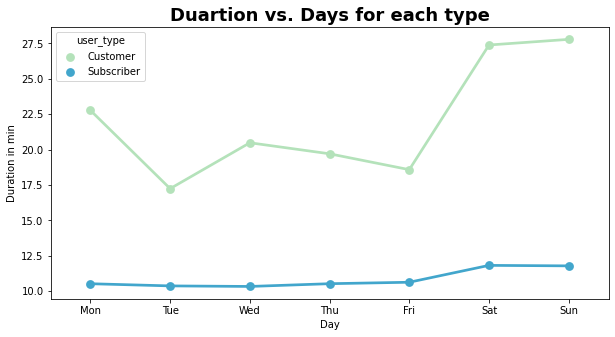

In [7]:
plt.figure(figsize=(10,5))
sb.pointplot(data = df_clean, x = 'start_day', y = 'duration_min', hue = 'user_type', palette = 'GnBu', ci=None , order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Duartion vs. Days for each type' , fontsize=18 , fontweight='bold')
plt.ylabel('Duration in min')
plt.xlabel('Day')
plt.show() 